# Sulfr Iodine Thermochemical cycle

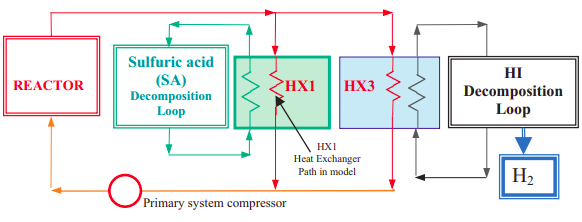

In [1]:
from IPython.display import Image
Image(filename='figures/sulfur3.png')

* decomposition of sulfuric acid: T >= 700C
The sulfuric acid vapors are decomposed in two steps:

H$_2$SO$_4$ $\rightarrow$ SO$_3$ + H$_2$O (T > 450C)

SO$_3$ $\rightarrow$ SO$_2$ + $\frac{1}{2}$O$_2$ (T > 800C)

(The introduction says T>700, and now it says 800C...)

At 1 bar, the production of sulfur dioxide decreases at T<800C. 50% at 700C, and no sulfur dioxide at 650C.

* Bunsen reaction: (exothermic reaction) T~120C

I$_2$ + SO$_2$ + 2H$_2$O $\rightarrow$ H$_2$SO$_4$ + 2HI

* decomposition of hydrogen iodide: T >= 300C

2HI $\rightarrow$ I$_2$ + H$_2$

Hydrogen is produced at P = 4MPa.

Production rate = 75 L/min.

Production rate for a 50MWth (estimate): 12000 kg/day.

https://art.inl.gov/NGNP/Subcontractors%20Documents/General%20Atomics/Sulfur%20Iodine%20Process%20Summary%20for%20the%20Hydrogen%20Technology%20Down-Selection.pdf

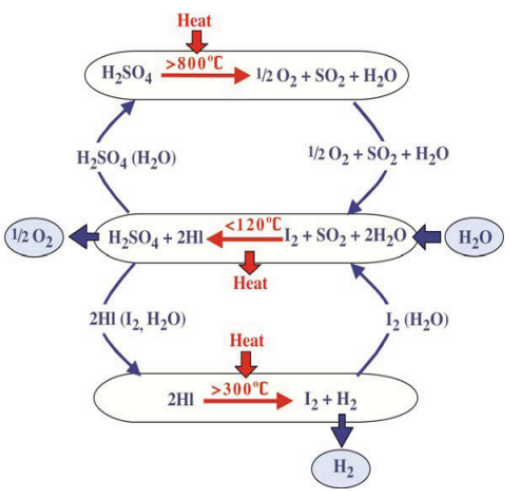

In [7]:
from IPython.display import Image
Image(filename='figures/sulfur1.png')

HYSYS simulator by Aspen Technologies. The most efficient temperature for sulfuric acid decomposition is 650$^\circ$C, with a thermal efficiency of 75.11%. The simulation does not consider heat loss in the process. Bilgen's flowsheet gives a thermal efficiency of  77%.

Sulfuric acid decomposition:
2H$_2$SO$_4$ = 2H$_2$O + 2SO$_2$, $\Delta$H = 186 kJ/mol, T=600-900C

Hydriodic acid decomposition reaction:
2HI = H$_2$ + I$_2$, $\Delta$H = 12 kJ/mol

https://core.ac.uk/download/pdf/37987793.pdf 

The values from this source seem to be inconsistent with other documents.

Sulfuric acid decomposition:
* Optimun temperature at 925C
* reaction enthalpy: 278.643kJ/mol

http://ethesis.nitrkl.ac.in/5368/1/109CH0524.pdf

This is not consistent with the previous numbers. Let's look for other sources.

278.64 kJ/mol to produce the SO$_2$, and the total thermal energy supplied was determined to be 366.747 kJ/mol SO2.

Okay, these numbers match the latter source.

https://www.sciencedirect.com/science/article/pii/019689049400036Y

**Note to myself:** I should get the mole fraction for all the molecules, relative to one H$_2$ mole.




https://web.mit.edu/yildizgroup/LEI/assets/pdfs/bilge_ijhe_2006.pdf

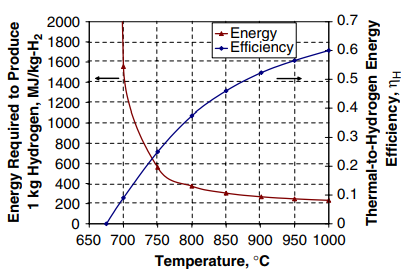

In [8]:
from IPython.display import Image
Image(filename='figures/si-energy.png')

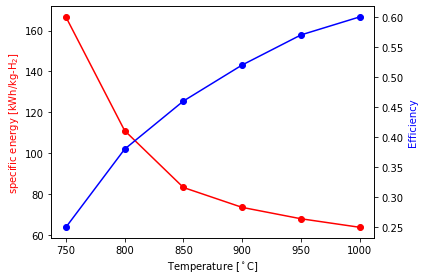

In [8]:
# I will get the data from the previous plot
import numpy as np
import matplotlib.pyplot as plt

temp = [750, 800, 850, 900, 950, 1000]
sel = [600, 400, 300, 265, 245, 230]  # specfic energy [MJ/kg-H2}
# convert to kWh/kg-H2
se = 1e3/3600 * np.array(sel)  # specific energy kWh/kg-H2
ef = [0.25, 0.38, 0.46, 0.52, 0.57, 0.6]

fig, ax1 = plt.subplots()
ax1.plot(temp, se, color='red', marker="o")
ax1.set_xlabel("Temperature [$^\circ$C]")
ax1.set_ylabel("specific energy [kWh/kg-H$_2$]", color="red")
ax2 = ax1.twinx()
ax2.plot(temp, ef, color='blue', marker="o")
ax2.set_ylabel('Efficiency', color='blue')
fig.tight_layout()
plt.show()

The data from https://web.mit.edu/yildizgroup/LEI/assets/pdfs/bilge_ijhe_2006.pdf comes originally from https://www.osti.gov/servlets/purl/814014.

T = 827C, $\eta$ = 0.50, P = 2400 MW$_{th}$, 4200 moles/s

Those numbers are consistent with Table 4-1 of the https://www.osti.gov/servlets/purl/814014.

|P[MW$_{th}$]|$\eta_{H,SI}$| prodcution rate [kg/day]|
|------------|-------------|-------------------------|
|50           | 40%        | 12000                   |
|600          | 42%        | 150000                  |
|2400         | 52%        | 760000                  |

Text(0.5, 0, 'Temperature [$^\\circ$C]')

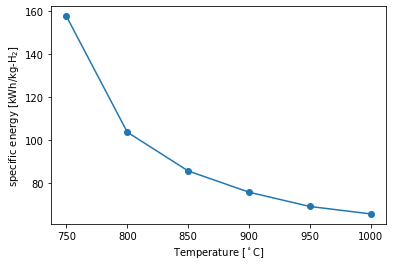

In [9]:
pr = 4200  # moles/sec
Mh = 1.008
sev = 2400e3/(pr*(2*Mh/1e3)*3600*np.array(ef)/0.5)

plt.plot(temp, sev, marker="o")
plt.ylabel("specific energy [kWh/kg-H$_2$]")
plt.xlabel("Temperature [$^\circ$C]")

In [6]:
HHV = 285  # kJ/mol
ef = 0.42
E = HHV/ef
print("1 mol of H2 takes:", E, "kJ at T=827C (outlet reactor T=850C)")
E = E/(2*1.008*1e-3)/3600  # kWh/kg-H2

P = 600  # MW
pr = P*1e3/E  # kg/h
pr *= 24  # kg/day  
pr

1 mol of H2 takes: 678.5714285714286 kJ at T=827C (outlet reactor T=850C)


154013.91157894736

### Different reactor sizes

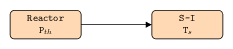

In [10]:
from wand.image import Image as WImage
img = WImage(filename='./figures/SI.pdf')
img

This will be helpful in the next section.

$H(T_r)-H(T_o)=\Delta H_{SI} (T_s)$, $T_s = T_r$

$T_o$: outlet temperature of the heat exchanger
$\dot{m}$ & $T_o$ are arbitrary. I choose $T_o \geq T_{sat}$ so it stays as a gas.

$\dot{m} \geq \frac{\Delta h_{SI}(T_s)}{h(T_s)-h(T_{sat})}$

I need to determine the pressure of the secondary loop.

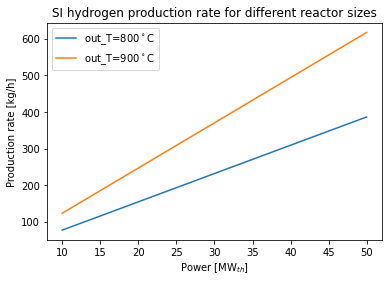

In [5]:
outT = [800, 900]  # Reactor outlet temperature
T = 0.97*np.array(outT)  # We consider that the steam temperature is 97% of the reactor outlet temperature

Pth1 = np.interp(T[0], temp, sev)
Pth2 = np.interp(T[1], temp, sev)

power = [10, 20, 30, 40, 50]  # MW_{th)
prate1 = [(P*1e3/Pth1) for P in power]  # kg-H2/h
prate2 = [(P*1e3/Pth2) for P in power]  # kg-H2/h

plt.plot(power, prate1, label='out_T=800$^\circ$C')
plt.plot(power, prate2, label='out_T=900$^\circ$C')
plt.legend(loc="upper left")
plt.title('SI hydrogen production rate for different reactor sizes')
plt.ylabel('Production rate [kg/h]')
plt.xlabel('Power [MW$_{th}$]')
plt.savefig("figures/si-size", dpi=300, bbox_inches="tight")
plt.show()

## SI2

Case where the reactor outlet temperature is not high enough as to make use of the SI thermochemical cycle. The steam receives a heat boosting by means of an electrical boiler.

* T$_s$: temperature at which the SI cycle operates
* T$_r$: 97% of the outlet reactor temperature

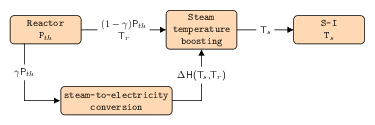

In [5]:
from wand.image import Image as WImage
img = WImage(filename='./figures/SI2.pdf')
img

$H(T_r)+H_{boost}-H(T_o)=\Delta H_{SI} (T_s)$

$T_o$: outlet temperature of the heat exchanger
$\dot{m}$ & $T_o$ are arbitrary. I choose $T_o \geq T_{sat}$ so it stays as a gas.

$\dot{m} \geq \frac{\Delta h_{SI}(T_s)}{h(T_s)-h(T_{sat})}$

I need to determine the pressure of the secondary loop in order to know T$_{sat}$. Or I could just use a high value, like T = 

Then, $ H_{boost} = \dot{m} (h(T_s)-h(T_r)) $.

I take the P=3.5MPa, for the enthalpy it won't change that much. A more accurate value for the pressure would be better, of course.


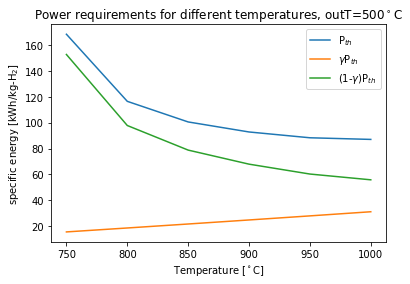

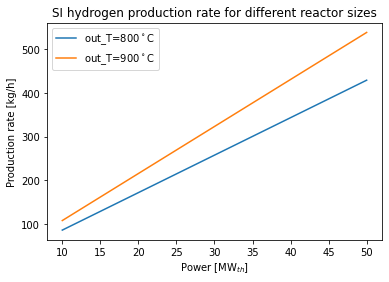

In [28]:
def delta_H(Tout, Tin):
    """ calculates H(Tout)-H(Tin) """

    # Enthalpy of water at different temperatures for P = 3.5MPa
    temp2 = [25, 50, 75, 100, 125, 150, 175, 200, 225, 242.56, 242.56, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]
    ent35 = [1.9468, 3.8255, 5.7076, 7.5974, 9.5, 11.423, 13.374, 15.368, 17.421, 18.912, 50.49, 50.977, 52.4, 53.657, 54.823, 55.935, 57.012, 58.066, 59.106, 60.136, 61.16, 62.182, 63.203, 64.225, 65.249, 66.276, 67.306, 68.341, 69.381, 70.426, 71.477, 72.534, 73.597, 74.666, 75.742, 76.825, 77.914, 79.009, 80.112, 81.221, 82.337, 83.459]    
    dH = np.interp(Tout, temp2, ent35) - np.interp(Tin, temp2, ent35) # [kJ/mol]

    return dH


def SI2(OutT, Ts):
    ef = 0.97
    Tr = ef * OutT
    dHsi = np.interp(Ts, temp, sev)
    # \dot{m} remains fixed, and it has the max value (T_s=T_r)
    ndot = np.interp(Tr, temp, sev)/delta_H(Tr, 170)
    dHboost = ndot*delta_H(Ts, Tr)
    dHboost = dHboost/(2*1.008*3.6)  #  [kWh/kg-H2]
    
    gammacPth = dHsi - dHboost
    etef = 0.95  # electrical-to-thermal conversion efficiency
    eta = 0.33  # thermal-to-electrical conversion efficiency
    gammaPth = 1/eta*1/etef*dHboost
    
    Pth = gammaPth + gammacPth
    gamma = gammaPth/Pth
    
    return Pth, gamma

OutT = 500
temp = [750, 800, 850, 900, 950, 1000]
Pth = [SI2(OutT, Ts)[0] for Ts in temp]
gamma = [SI2(OutT, Ts)[1] for Ts in temp]

plt.plot(temp, Pth, label='P$_{th}$')
plt.plot(temp, np.array(gamma)*np.array(Pth), label="$\gamma$P$_{th}$")
plt.plot(temp, (1-np.array(gamma))*np.array(Pth), label="(1-$\gamma$)P$_{th}$")
plt.legend(loc="upper right")
plt.title('Power requirements for different temperatures, outT={0}$^\circ$C'.format(OutT))
plt.ylabel("specific energy [kWh/kg-H$_2$]")
plt.xlabel("Temperature [$^\circ$C]")
plt.savefig("figures/si2-overT", dpi=300, bbox_inches="tight")
plt.show()

Ts = 800
Pth1 = SI2(OutT, Ts)[0]
Ts = 900
Pth2 = SI2(OutT, Ts)[0]

power = [10, 20, 30, 40, 50]  # MW_{th)
prate1 = [(P*1e3/Pth1) for P in power]  # kg-H2/h
prate2 = [(P*1e3/Pth2) for P in power]  # kg-H2/h

plt.plot(power, prate1, label='out_T=800$^\circ$C')
plt.plot(power, prate2, label='out_T=900$^\circ$C')
plt.legend(loc="upper left")
plt.title('SI hydrogen production rate for different reactor sizes')
plt.ylabel('Production rate [kg/h]')
plt.xlabel('Power [MW$_{th}$]')
plt.savefig("figures/si2-size", dpi=300, bbox_inches="tight")
plt.show()

## Future work

* 1 mol of H2 requires 678.5 kJ, see where this number comes from. I think it is related to the formation enthalpies of H$_2$SO$_4$ and HI. This report gives very detailed descriptions of Section 2 and 3 of the process https://www.osti.gov/servlets/purl/814014

### Others sources:
* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.511.9997&rep=rep1&type=pdf
* https://www.hydrogen.energy.gov/pdfs/progress08/ii_h_1_pickard.pdf  
* https://www.scirp.org/journal/paperinformation.aspx?paperid=90227
* https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6076030